<a href="https://colab.research.google.com/github/SiranjeviKrishnan/Face-Mask-Detection/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install matplotlib

In [ ]:
!pip install git+https://github.com/teaching-repositories/simulacra.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.4 MB/s eta 0:00:00


In [ ]:
from simulacra.stock_market_simulation import StockMarketSimulation
import matplotlib.pyplot as plt
import m

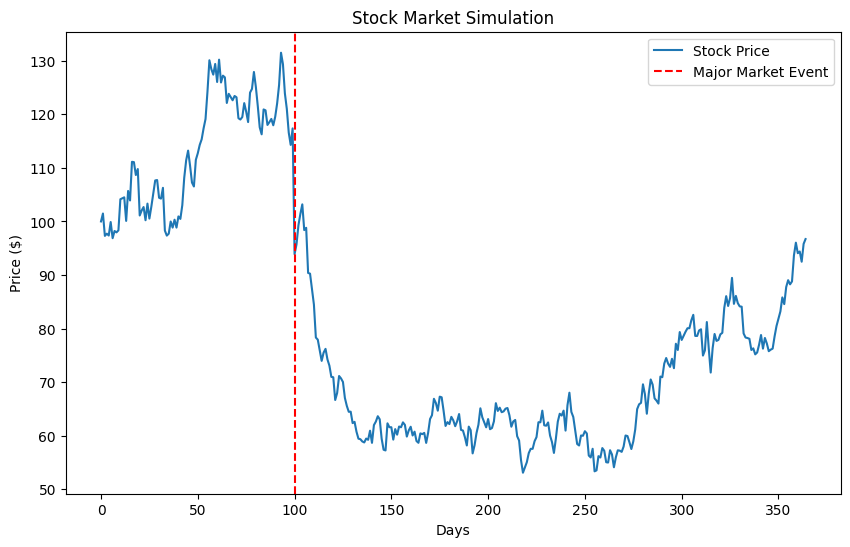

In [ ]:
# Write a helper function
def plot_prices(prices, event_day=None):
    """
    Plots the stock prices from a simulation with an optional vertical line marking a major market event.

    Parameters:
        prices (List[float]): A list of stock prices to be plotted.
        event_day (Optional[int]): The day on which the major market event occurs (defaults to None).

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(prices, label='Stock Price')
    if event_day is not None:
        plt.axvline(x=event_day, color='red', linestyle='--', label='Major Market Event')
    plt.xlabel('Days')
    plt.ylabel('Price ($)')
    plt.title('Stock Market Simulation')
    plt.legend()
    plt.show()

In [ ]:
# Calculating Volatility
def calc_volatility(prices):
    returns = []
    for i in range(len(prices) - 1):
        current_price = prices[i]
        next_price = prices[i + 1]
        return_value = (next_price - current_price) / current_price
        returns.append(return_value)

    volatility = []
    for i in range(len(returns)):
        subset_returns = returns[:i + 1]
        mean_return = sum(subset_returns) / len(subset_returns)
        squared_deviations = [(r - mean_return) ** 2 for r in subset_returns]
        variance = sum(squared_deviations) / len(squared_deviations)
        volatility.append(variance ** 0.5)

    return volatility

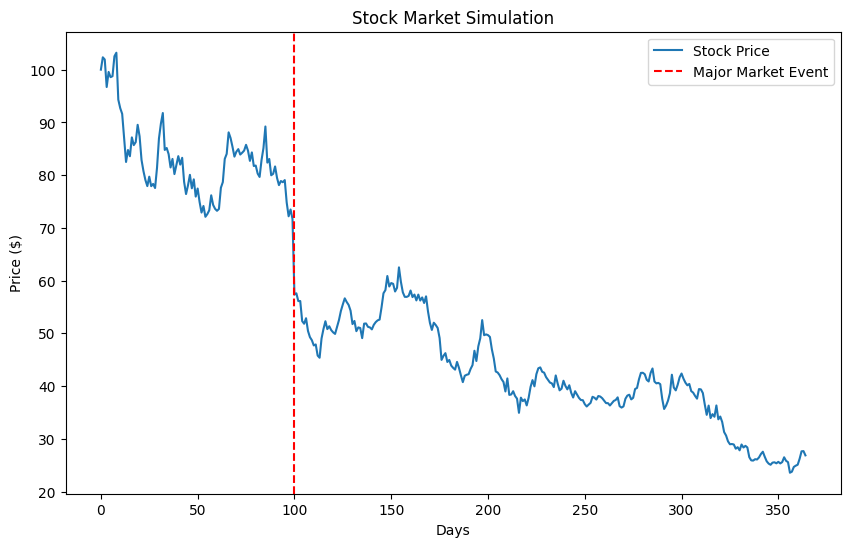

In [ ]:
# Create the simulation
sim = StockMarketSimulation(start_price=100, days=365, volatility=0.03,
                            drift=-0.001, event_day=100, event_impact=-0.2)

# Run the simulation
prices = sim.run_simulation()

# Visualize the results
plot_prices(prices, sim.event_day)

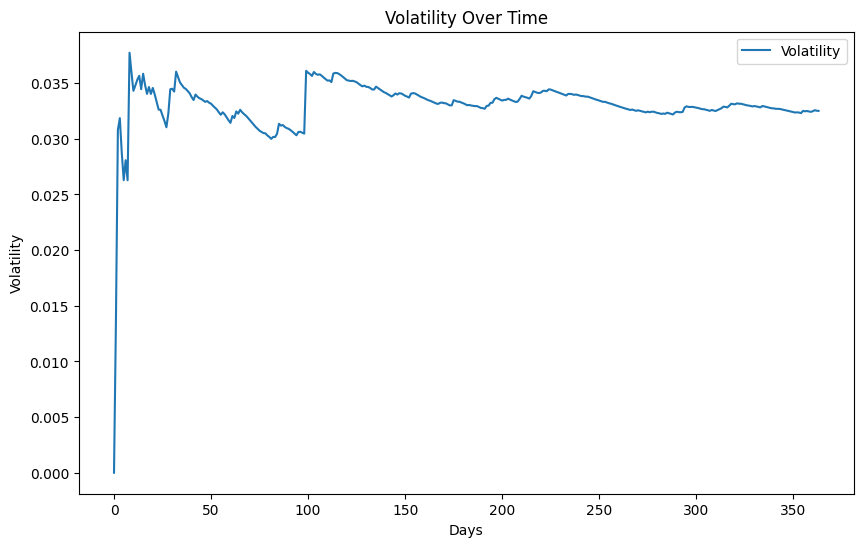

In [ ]:
# Volatility plt
volatility = calc_volatility(prices)
plt.figure(figsize=(10, 6))
plt.plot(volatility, label='Volatility')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.title('Volatility Over Time')
plt.legend()
plt.show()

In [ ]:
# printing final price and impact of the market event
print("Final price:", prices[-1])
event_price = prices[sim.event_day]
impact = (prices[-1] - event_price) / event_price
print("Impact of market event:", impact)

Final price: 26.866349226142745
Impact of market event: -0.5315855734698107
